In [ ]:
!nvidia-smi

Sun Jun 26 09:43:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    33W / 250W |   4029MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://huggingface.co/ffarzad/xlnet_sentiment

fatal: destination path 'xlnet_sentiment' already exists and is not an empty directory.


## Lấy dữ liệu

In [ ]:
!gdown https://drive.google.com/uc?id=1LxoEvYkaYrPIfaFRzQXcfNYDBmrCicg3
!gdown https://drive.google.com/uc?id=1_qmqKEw6k8eD59APKJBiJnLm79PiMpNC
!gdown https://drive.google.com/uc?id=1fSvo1SJnP5wZp3AGiiblnG8XunbqiunY
!gdown https://drive.google.com/uc?id=1-rMx7zbIOuWyCQDquC1xfzVXWafmWkXE
!gdown https://drive.google.com/uc?id=1TC-7BAQpfRCGhC5kUAA7lnOo-LXqpAKI
!gdown https://drive.google.com/uc?id=1QA2kq33CDtZSOv8MIW-_uDzzyNTAD1PP

Downloading...
From: https://drive.google.com/uc?id=1LxoEvYkaYrPIfaFRzQXcfNYDBmrCicg3
To: /content/train.rar
100% 189k/189k [00:00<00:00, 103MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_qmqKEw6k8eD59APKJBiJnLm79PiMpNC
To: /content/test.rar
100% 57.5k/57.5k [00:00<00:00, 67.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fSvo1SJnP5wZp3AGiiblnG8XunbqiunY
To: /content/dev.rar
100% 29.2k/29.2k [00:00<00:00, 28.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-rMx7zbIOuWyCQDquC1xfzVXWafmWkXE
To: /content/VnCoreNLP-1.1.1.jar
100% 27.4M/27.4M [00:00<00:00, 63.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TC-7BAQpfRCGhC5kUAA7lnOo-LXqpAKI
To: /content/models-20220212T185004Z-001.zip
100% 227k/227k [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QA2kq33CDtZSOv8MIW-_uDzzyNTAD1PP
To: /content/data.rar
100% 13.6k/13.6k [00:00<00:00, 18.8MB/s]


In [ ]:
!unzip /content/models-20220212T185004Z-001.zip
!unrar x train.rar
!unrar x dev.rar
!unrar x test.rar
!unrar x data.rar

Archive:  /content/models-20220212T185004Z-001.zip
  inflating: models/wordsegmenter/wordsegmenter.rdr  
  inflating: models/wordsegmenter/vi-vocab  

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from train.rar

Creating    train                                                     OK
Extracting  train/sentiments.txt                                           1%  OK 
Extracting  train/sents.txt                                               19% 36% 53% 71% 88% 98%  OK 
Extracting  train/topics.txt                                              99%  OK 
All OK

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from dev.rar

Creating    dev                                                       OK
Extracting  dev/sentiments.txt                                             1%  OK 
Extracting  dev/sents.txt                                                 97%  OK 
Extract

In [ ]:
!gdown https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv
!mv sentiments.txt train/
!gdown https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO
!mv sentiments.txt test/
!gdown https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL
!mv sentiments.txt dev/
!gdown https://drive.google.com/uc?id=1DwLgDEaFWQe8mOd7EpF-xqMEbDLfdT-W
!mv topics.txt dev/

Downloading...
From: https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv
To: /content/sentiments.txt
100% 22.9k/22.9k [00:00<00:00, 35.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO
To: /content/sentiments.txt
100% 6.33k/6.33k [00:00<00:00, 7.01MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL
To: /content/sentiments.txt
100% 3.17k/3.17k [00:00<00:00, 4.64MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DwLgDEaFWQe8mOd7EpF-xqMEbDLfdT-W
To: /content/topics.txt
100% 3.17k/3.17k [00:00<00:00, 4.52MB/s]


In [ ]:
!rm -r *.rar *.txt *.zip

rm: cannot remove '*.txt': No such file or directory


## Đọc dữ liệu

In [ ]:
#@title Library
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os 
import matplotlib.pyplot as plt
import json
import re
from sklearn.model_selection import train_test_split

In [ ]:
TRAIN_PATH = "train"
DEV_PATH = "dev"
TEST_PATH = "test"
DATA_ADDED = "data"

In [ ]:
data = np.genfromtxt(os.path.join(DATA_ADDED , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(DATA_ADDED , 'sentiments.txt'), delimiter='\n', dtype=int)
topics = np.genfromtxt(os.path.join(DEV_PATH , 'topics.txt'), delimiter='\n', dtype=int)
added = pd.DataFrame({"review":data,"sentiment":label})
added.to_csv("added_data.csv")

In [ ]:
data = np.genfromtxt(os.path.join(DEV_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(DEV_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
dev = pd.DataFrame({"review":data,"sentiment":label})
dev.to_csv("dev.csv")

In [ ]:
data = np.genfromtxt(os.path.join(TRAIN_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(TRAIN_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
train = pd.DataFrame({"review":data,"sentiment":label})
train_original = pd.concat([train , dev], axis = 0 )
train = pd.concat([train , dev, added], axis = 0 )
train_original.to_csv("train_original.csv")
train.to_csv("train.csv")

In [ ]:
data = np.genfromtxt(os.path.join(TEST_PATH , 'sents.txt'), delimiter='\n', dtype=str)
label = np.genfromtxt(os.path.join(TEST_PATH , 'sentiments.txt'), delimiter='\n', dtype=int)
test = pd.DataFrame({"review":data,"sentiment":label})
test.to_csv("test.csv")

In [ ]:
#@title Install library
!pip install -q -U watermark
!pip install -qq transformers
!pip install -qq sentencepiece
!pip install -qq vncorenlp
!pip install -qq fastBPE
!pip install -qq fairseq
!pip install -qq ray[tune]

     |████████████████████████████████| 4.4 MB 15.1 MB/s 
     |████████████████████████████████| 6.6 MB 61.3 MB/s 
     |████████████████████████████████| 101 kB 11.5 MB/s 
     |████████████████████████████████| 596 kB 65.3 MB/s 
     |████████████████████████████████| 1.2 MB 14.9 MB/s 
     |████████████████████████████████| 2.6 MB 15.2 MB/s 
     |████████████████████████████████| 10.9 MB 10.5 MB/s 
     |████████████████████████████████| 92 kB 14.3 MB/s 
     |████████████████████████████████| 236 kB 74.1 MB/s 
     |████████████████████████████████| 123 kB 57.5 MB/s 
     |████████████████████████████████| 112 kB 74.9 MB/s 
     |████████████████████████████████| 54.5 MB 198 kB/s 
     |████████████████████████████████| 144 kB 68.5 MB/s 
     |████████████████████████████████| 4.1 MB 53.2 MB/s 
     |████████████████████████████████| 10.1 MB 59.5 MB/s 
     |████████████████████████████████| 125 kB 60.2 MB/s 
     |████████████████████████████████| 461 kB 69.9 MB/s 


In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 5.5.0

numpy       : 1.21.6
pandas      : 1.3.5
torch       : 1.11.0+cu113
transformers: 4.20.1



## EDA

In [ ]:
train = pd.read_csv("train.csv",index_col = 0)
dev = pd.read_csv("dev.csv",index_col = 0)
test = pd.read_csv("test.csv",index_col = 0)
added = pd.read_csv("added_data.csv",index_col = 0)
train_original = pd.read_csv("train_original.csv",index_col = 0)
print("Train original: ",train_original.shape)
print("Train shape: ",train.shape)
print("Dev shape: ", dev.shape)
print("Test shape: ", test.shape)
print("Data Added shape: ", added.shape)

Train original:  (13009, 2)
Train shape:  (14066, 2)
Dev shape:  (1583, 2)
Test shape:  (3166, 2)
Data Added shape:  (1057, 2)


In [ ]:
(dev.shape[0]/train.shape[0])*100

11.254087871463103

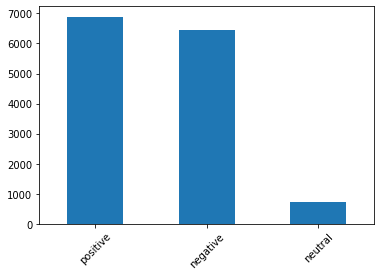

In [ ]:
train.sentiment.map({0:"negative",1: "neutral", 2 : "positive"}).value_counts().plot.bar(rot = 45);

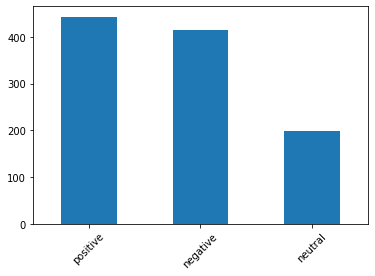

In [ ]:
added.sentiment.map({0:"negative",1: "neutral",2 : "positive"}).value_counts().plot.bar(rot = 45);

+ Dữ liệu tập trung nhiều ở 2 lớp quan trọng là positive và negative

In [ ]:
train.review.apply(lambda x: len(x.split())).describe()

count    14066.000000
mean        13.867695
std          9.876704
min          2.000000
25%          8.000000
50%         11.000000
75%         17.000000
max        161.000000
Name: review, dtype: float64

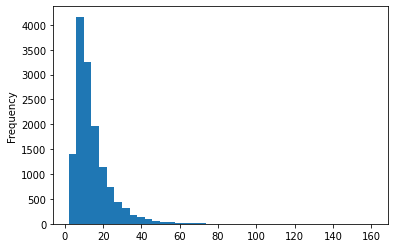

In [ ]:
train.review.apply(lambda x: len(x.split())).plot.hist(bins = 40);

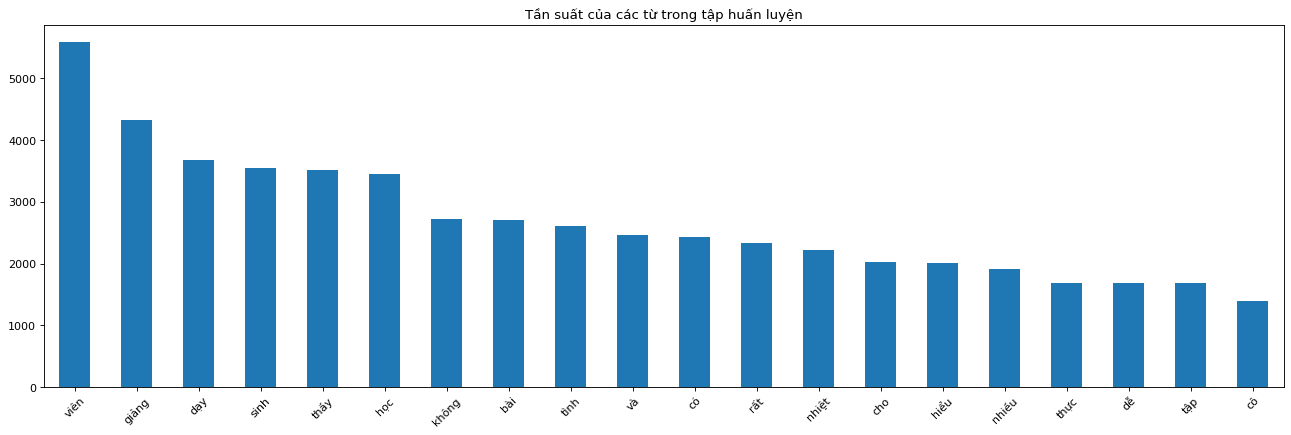

In [ ]:
plt.figure(figsize = (20, 6), dpi = 80)
train['review'].str.replace(".","").str.replace(",","").str.split().explode().value_counts().nlargest(20).plot.bar(rot = 45)
plt.title("Tần suất của các từ trong tập huấn luyện");

* max_sequence_lenght = 32

# XLNet

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers
from transformers import XLNetTokenizer, XLNetModel, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score
from collections import defaultdict
from textwrap import wrap
from pylab import rcParams

from torch import nn, optim
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset,RandomSampler,SequentialSampler
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,review,sentiment
0,0,slide giáo trình đầy đủ .,2
1,1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2
2,2,đi học đầy đủ full điểm chuyên cần .,0
3,3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2


In [ ]:
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
df.shape

(14066, 3)

In [ ]:
df = df[:24000]
len(df)

14066

In [ ]:
#import re
#def clean_text(text):
   # text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
   # text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
   # text = re.sub(r"[^a-zA-z.!?'0-9]", ' ', text)
   # text = re.sub('\t', ' ',  text)
   # text = re.sub(r" +", ' ', text)
   # return text

In [ ]:
#df['review'] = df['review'].apply(clean_text)

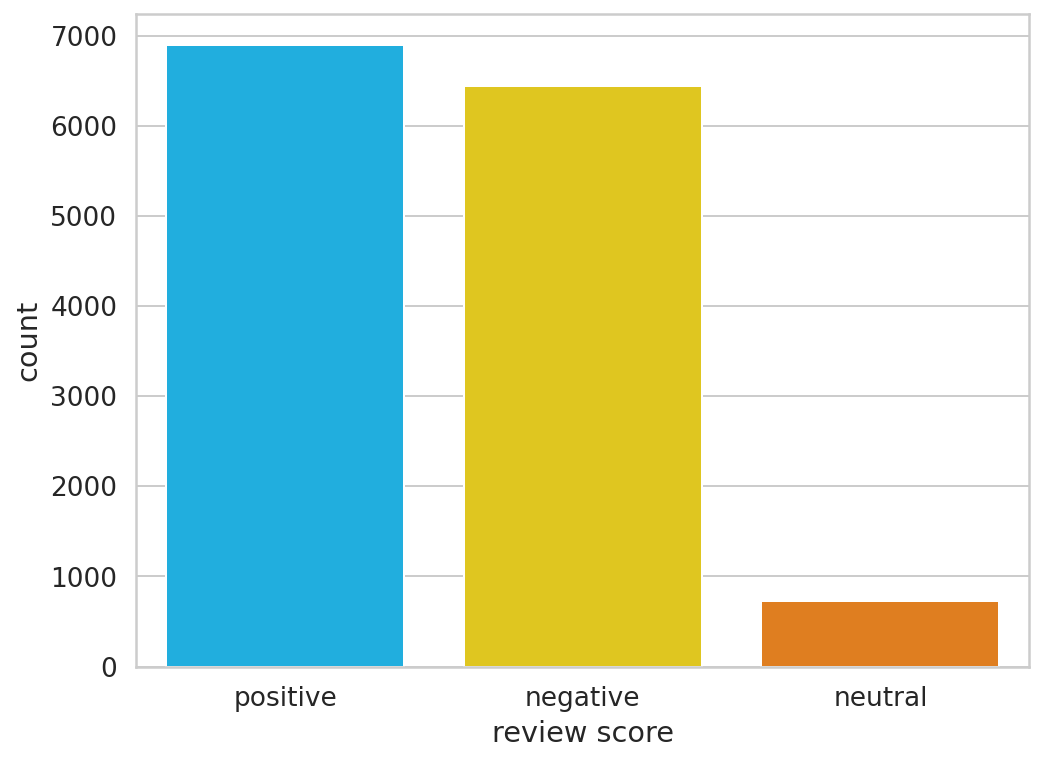

In [ ]:
rcParams['figure.figsize'] = 8, 6
sns.countplot(df.sentiment.map({0:"negative",1: "neutral", 2 : "positive"}))
plt.xlabel('review score');

In [ ]:
df['sentiment'].value_counts()

2    6891
0    6445
1     730
Name: sentiment, dtype: int64

In [ ]:
class_names = ['negative','neutral', 'positive']

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import AutoTokenizer
from sklearn.metrics import classification_report,confusion_matrix

import argparse
import os
import logging
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from vncorenlp import VnCoreNLP
import torch
from torch.utils.data import Dataset, DataLoader, RandomSampler
from transformers import XLNetTokenizer, XLNetModel, Trainer, TrainingArguments, XLNetForSequenceClassification
from ray import tune
import pandas as pd
import numpy as np
import json
from tqdm import tqdm
tqdm.pandas()

In [ ]:
from transformers import XLNetTokenizer, XLNetModel
PRE_TRAINED_MODEL_NAME = 'xlnet-base-cased'
tokenizer = XLNetTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

In [ ]:
input_txt = "Tôi là sinh viên trường đại học Bách_khoa ."
encodings = tokenizer.encode_plus(input_txt, add_special_tokens=True, max_length=32, return_tensors='pt', return_token_type_ids=False, return_attention_mask=True, pad_to_max_length=False)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
print('input_ids : ',encodings['input_ids'])

input_ids :  tensor([[  324,   150,  2483,  7565,   409,    17,  2596,   254,    17,  6380,
          2555,    17,     0,  5936,  6938,   369, 12129,  2732,  6049, 14070,
            17,     9,     4,     3]])


In [ ]:
tokenizer.convert_ids_to_tokens(encodings['input_ids'][0])

['▁To',
 'i',
 '▁la',
 '▁sin',
 'h',
 '▁',
 'vi',
 'en',
 '▁',
 'tru',
 'ong',
 '▁',
 '<unk>',
 'ai',
 '▁ho',
 'c',
 '▁Bach',
 '_',
 'kh',
 'oa',
 '▁',
 '.',
 '<sep>',
 '<cls>']

In [ ]:
type(encodings['attention_mask'])

torch.Tensor

In [ ]:
with VnCoreNLP("VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') as rdrsegmenter:
       df["review"] = df["review"].apply(str).progress_apply(lambda x: ' '.join([' '.join(sent) for sent in rdrsegmenter.tokenize(x)]))

100%|██████████| 14066/14066 [00:49<00:00, 282.28it/s]


In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
attention_mask = pad_sequences(encodings['attention_mask'], maxlen=128, dtype=torch.Tensor ,truncating="post",padding="post")

In [ ]:
attention_mask = attention_mask.astype(dtype = 'int64')
attention_mask = torch.tensor(attention_mask) 
attention_mask.flatten()

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
encodings['input_ids']

tensor([[  324,   150,  2483,  7565,   409,    17,  2596,   254,    17,  6380,
          2555,    17,     0,  5936,  6938,   369, 12129,  2732,  6049, 14070,
            17,     9,     4,     3]])

In [ ]:
token_lens = []

for txt in df['review']:
  tokens = tokenizer.encode(txt, max_length = 128)
  token_lens.append(len(tokens))

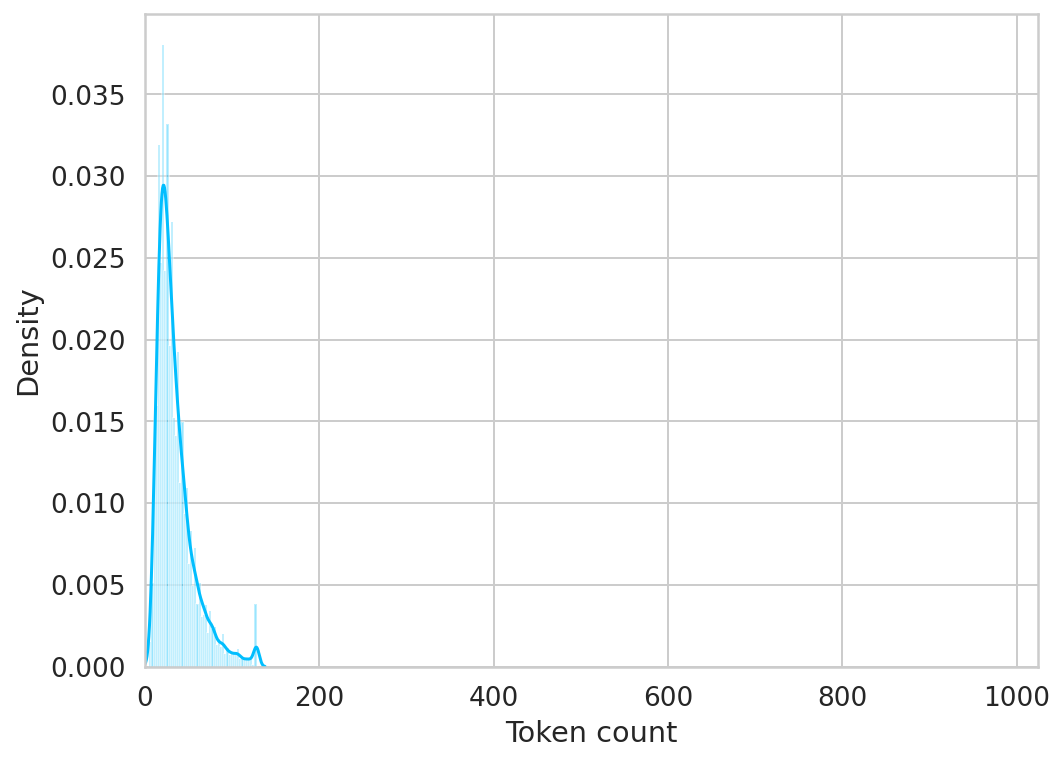

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 1024]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 128

In [ ]:
class XLNetDataset(Dataset):


    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.reviews)
    
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        encoding = self.tokenizer.encode_plus(
        review,
        add_special_tokens=True,
        max_length=self.max_len,
        return_token_type_ids=False,
        pad_to_max_length=False,
        return_attention_mask=True,
        return_tensors='pt',
        )

        input_ids = pad_sequences(encoding['input_ids'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
        input_ids = input_ids.astype(dtype = 'int64')
        input_ids = torch.tensor(input_ids) 

        attention_mask = pad_sequences(encoding['attention_mask'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
        attention_mask = attention_mask.astype(dtype = 'int64')
        attention_mask = torch.tensor(attention_mask)       

        return {
        'review_text': review,
        'input_ids': input_ids,
        'attention_mask': attention_mask.flatten(),
        'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
df_train, df_test = train_test_split(df, train_size=0.25, random_state=101)
df_val, df_test = train_test_split(df_test, test_size=0.25, random_state=101)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((3516, 3), (7912, 3), (2638, 3))

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = XLNetDataset(
    reviews=df.review.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [ ]:
BATCH_SIZE = 4
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
from transformers import XLNetForSequenceClassification
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels = 3)
model = model.to(device)

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
model

XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (1): XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward

In [ ]:
EPOCHS = 10
BATCH_SIZE = 4

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
                                {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay':  0.01},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay':0.0}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=3e-5)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer ,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

In [ ]:
data = next(iter(val_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
targets = data['targets'].to(device)
print(input_ids.reshape(4,128).shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([4, 128])
torch.Size([4, 128])


In [ ]:
input_ids[0]

tensor([[ 116,  150, 2732,   66, 2517,   17, 3141, 2075, 2732,  765,   17, 3525,
          101,   17, 3141, 2075, 2732, 2596,  254, 2147,  102, 2732, 9273,   17,
            9,    4,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]], device='cuda:0')

In [ ]:
outputs = model(input_ids.reshape(4,128), token_type_ids=None, attention_mask=attention_mask, labels=targets)
outputs

XLNetForSequenceClassificationOutput([('loss',
                                       tensor(1.4539, device='cuda:0', grad_fn=<NllLossBackward0>)),
                                      ('logits',
                                       tensor([[-0.4705,  0.2125,  0.4155],
                                               [ 0.1160,  0.1569,  0.7002],
                                               [-0.0940,  0.2140,  0.4769],
                                               [-0.7633,  0.1241,  0.5168]], device='cuda:0',
                                              grad_fn=<AddmmBackward0>)),
                                      ('mems',
                                       (tensor([[[-0.0474, -0.0373,  0.0001,  ..., -0.0342, -0.0506, -0.0096],
                                                 [-0.0387, -0.0099, -0.0053,  ...,  0.0643,  0.0192, -0.0144],
                                                 [-0.0387, -0.0099, -0.0053,  ...,  0.0643,  0.0192, -0.0144],
                           

In [ ]:
type(outputs[0])

torch.Tensor

In [ ]:
from sklearn import metrics
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    acc = 0
    counter = 0
  
    for d in data_loader:
        input_ids = d["input_ids"].reshape(4,128).to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        
        outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)
        loss = outputs[0]
        logits = outputs[1]

        # preds = preds.cpu().detach().numpy()
        _, prediction = torch.max(outputs[1], dim=1)
        targets = targets.cpu().detach().numpy()
        prediction = prediction.cpu().detach().numpy()
        accuracy = metrics.accuracy_score(targets, prediction)

        acc += accuracy
        losses.append(loss.item())
        
        loss.backward()

        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        counter = counter + 1

    return acc / counter, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, device, n_examples):
    model = model.eval()
    losses = []
    acc = 0
    counter = 0
  
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].reshape(4,128).to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)
            loss = outputs[0]
            logits = outputs[1]

            _, prediction = torch.max(outputs[1], dim=1)
            targets = targets.cpu().detach().numpy()
            prediction = prediction.cpu().detach().numpy()
            accuracy = metrics.accuracy_score(targets, prediction)

            acc += accuracy
            losses.append(loss.item())
            counter += 1

    return acc / counter, np.mean(losses)

In [ ]:

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,     
        optimizer, 
        device, 
        scheduler, 
        len(df_train)
    )

    print(f'Train loss {train_loss} Train accuracy {train_acc}')

    val_acc, val_loss = eval_model(
        model,
        val_data_loader, 
        device, 
        len(df_val)
    )

    print(f'Val loss {val_loss} Val accuracy {val_acc}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), '/content/xlnet_sentiment/xlnet_model.bin')
        best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.7664884429118268 Train accuracy 0.7477246871444824
Val loss 0.8640000532078339 Val accuracy 0.8276036400404448

Epoch 2/10
----------
Train loss 0.6517760709022936 Train accuracy 0.8486916951080774
Val loss 0.6869867864378922 Val accuracy 0.8595803842264914

Epoch 3/10
----------
Train loss 0.5887326604781505 Train accuracy 0.8592150170648464
Val loss 0.685109783779487 Val accuracy 0.8619817997977756

Epoch 4/10
----------
Train loss 0.5040410993586584 Train accuracy 0.8902161547212741
Val loss 0.7011422616341579 Val accuracy 0.8677957532861477

Epoch 5/10
----------
Train loss 0.4307663689271586 Train accuracy 0.9124004550625711
Val loss 0.7159951285471932 Val accuracy 0.868427704752275

Epoch 6/10
----------
Train loss 0.37824965653080433 Train accuracy 0.9246302616609784
Val loss 0.6825115381683768 Val accuracy 0.8751263902932255

Epoch 7/10
----------
Train loss 0.3008000582404407 Train accuracy 0.944254835039818
Val loss 0.7504310252292541 Val ac

In [ ]:
model.load_state_dict(torch.load('/content/xlnet_sentiment/xlnet_model.bin'))

<All keys matched successfully>

In [ ]:
model = model.to(device)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
def show_confusion_matrix(confusion_matrix):

  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

def get_predictions(model, data_loader, path_test = 'test.csv'):
    model = model.eval()
    
    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:

            texts = d["review_text"]
            input_ids = d["input_ids"].reshape(-1,128).to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)
            
            outputs = model(input_ids=input_ids, token_type_ids=None, attention_mask=attention_mask, labels = targets)

            loss = outputs[0]
            logits = outputs[1]
            
            _, preds = torch.max(outputs[1], dim=1)

            probs = F.softmax(outputs[1], dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(probs)
            real_values.extend(targets)
   
    class_names = ["negative","neutral","positive"]
    
    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()
    
    print(classification_report(y_test, y_pred, target_names=class_names))
    cm = confusion_matrix(y_test, predictions ,normalize="true")

    ax = sns.heatmap(cm, annot=True,  cmap='Blues')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)

    return review_texts, predictions, prediction_probs, real_values

              precision    recall  f1-score   support

    negative       0.89      0.92      0.91      1206
     neutral       0.62      0.19      0.29       135
    positive       0.90      0.93      0.92      1297

    accuracy                           0.89      2638
   macro avg       0.80      0.68      0.70      2638
weighted avg       0.88      0.89      0.88      2638



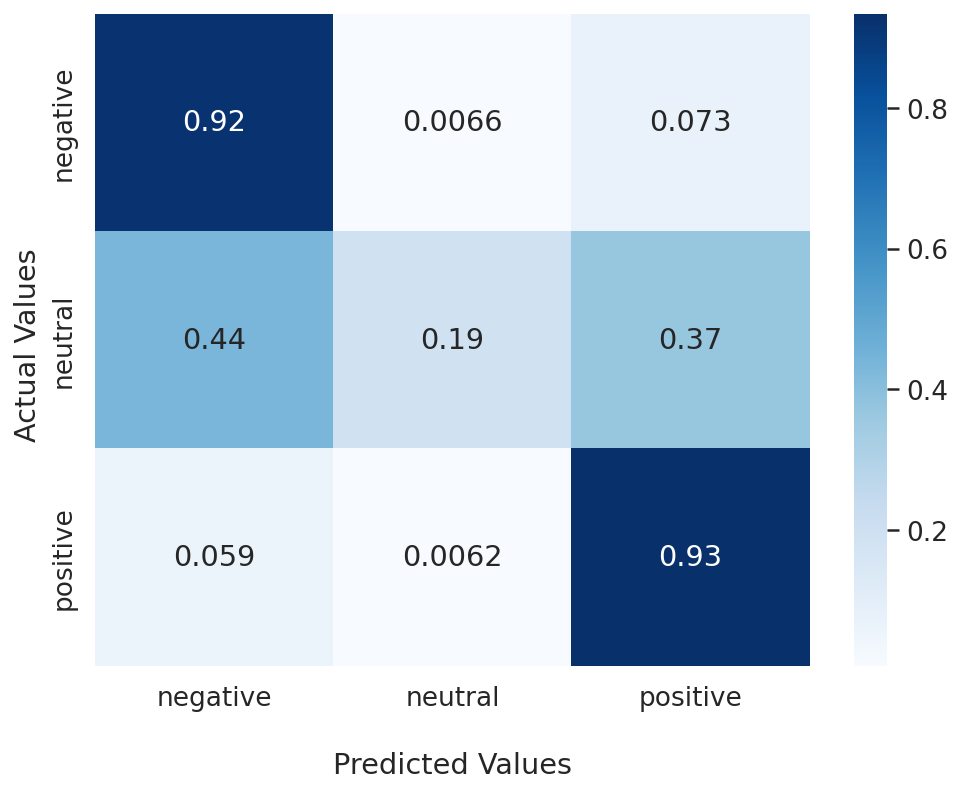

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(model,test_data_loader)

In [ ]:
def predict_sentiment(text):
    review_text = text

    encoded_review = tokenizer.encode_plus(
    review_text,
    max_length=MAX_LEN,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=False,
    return_attention_mask=True,
    return_tensors='pt',
    )

    input_ids = pad_sequences(encoded_review['input_ids'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
    input_ids = input_ids.astype(dtype = 'int64')
    input_ids = torch.tensor(input_ids) 

    attention_mask = pad_sequences(encoded_review['attention_mask'], maxlen=MAX_LEN, dtype=torch.Tensor ,truncating="post",padding="post")
    attention_mask = attention_mask.astype(dtype = 'int64')
    attention_mask = torch.tensor(attention_mask) 

    input_ids = input_ids.reshape(-1,128).to(device)
    attention_mask = attention_mask.to(device)

    outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    outputs = outputs[0][0].cpu().detach()

    probs = F.softmax(outputs, dim=-1).cpu().detach().numpy().tolist()
    _, prediction = torch.max(outputs, dim =-1)

    print("Positive score:", probs[2])
    print("Neutral score:" , probs[1])
    print("Negative score:", probs[0])
    print(f'Review text: {review_text}')
    print(f'Sentiment  : {class_names[prediction]}')

In [ ]:
text = "dạy nhanh, không hiểu"
predict_sentiment(text)

Positive score: 0.0015949560329318047
Neutral score: 0.0012645317474380136
Negative score: 0.9971405267715454
Review text: dạy nhanh, không hiểu
Sentiment  : negative


In [ ]:
text = "thầy dạy hay, dễ hiểu"
predict_sentiment(text)

Positive score: 0.9987630844116211
Neutral score: 0.0005512908683158457
Negative score: 0.0006856451509520411
Review text: thầy dạy hay, dễ hiểu
Sentiment  : positive


In [ ]:
text = "cung cấp đầy đủ tài liệu tham khảo"
predict_sentiment(text)

Positive score: 0.2432972490787506
Neutral score: 0.6512846946716309
Negative score: 0.10541805624961853
Review text: cung cấp đầy đủ tài liệu tham khảo
Sentiment  : neutral


In [ ]:
text = "tài liệu không chi tiết lắm"
predict_sentiment(text)

Positive score: 0.0021149059757590294
Neutral score: 0.0026935595087707043
Negative score: 0.9951915740966797
Review text: tài liệu không chi tiết lắm
Sentiment  : negative


In [ ]:
text = "có hứng thú học"
predict_sentiment(text)

Positive score: 0.9400484561920166
Neutral score: 0.028037134557962418
Negative score: 0.03191437944769859
Review text: có hứng thú học
Sentiment  : positive


In [ ]:
text = "cô dạy buồn ngủ "
predict_sentiment(text)

Positive score: 0.0022322535514831543
Neutral score: 0.003139705862849951
Negative score: 0.9946280121803284
Review text: cô dạy buồn ngủ 
Sentiment  : negative


In [ ]:
text = "thầy giáo rất vui tính"
predict_sentiment(text)

Positive score: 0.998765230178833
Neutral score: 0.0005504648433998227
Negative score: 0.000684334198012948
Review text: thầy giáo rất vui tính
Sentiment  : positive


In [ ]:
text = "môn học không hấp dẫn"
predict_sentiment(text)

Positive score: 0.0016567441634833813
Neutral score: 0.0015583861386403441
Negative score: 0.9967848062515259
Review text: môn học không hấp dẫn
Sentiment  : negative


In [ ]:
text = "thầy ít quan sát thực hành "
predict_sentiment(text)

Positive score: 0.0016350647201761603
Neutral score: 0.0012580021284520626
Negative score: 0.9971068501472473
Review text: thầy ít quan sát thực hành 
Sentiment  : negative


In [ ]:
text = "có sai sót trong chấm thi"
predict_sentiment(text)

Positive score: 0.001607797690667212
Neutral score: 0.0013718276750296354
Negative score: 0.997020423412323
Review text: có sai sót trong chấm thi
Sentiment  : negative


In [ ]:
text = "cô nhiệt tình trong việc trao đổi, giúp đỡ trong việc học của sinh viên"
predict_sentiment(text)

Positive score: 0.9987431168556213
Neutral score: 0.0005455680075101554
Negative score: 0.0007113010506145656
Review text: cô nhiệt tình trong việc trao đổi, giúp đỡ trong việc học của sinh viên
Sentiment  : positive


In [ ]:
text ='slide giáo trình đầy đủ'
predict_sentiment(text)

Positive score: 0.04365020617842674
Neutral score: 0.9291766881942749
Negative score: 0.027173075824975967
Review text: slide giáo trình đầy đủ
Sentiment  : neutral


In [ ]:
text ='thầy ít quan tâm sinh viên thực hành'
predict_sentiment(text)

Positive score: 0.0017067892476916313
Neutral score: 0.0014515258371829987
Negative score: 0.9968416690826416
Review text: thầy ít quan tâm sinh viên thực hành
Sentiment  : negative


In [ ]:
text ='sinh viên không tập trung học'
predict_sentiment(text)

Positive score: 0.002060094615444541
Neutral score: 0.0025223216507583857
Negative score: 0.995417594909668
Review text: sinh viên không tập trung học
Sentiment  : negative


In [ ]:
text ='sinh viên học ghép không tuân thủ nội quy lớp học, hay nói chuyện trong giờ và không tôn trọng giáo viên'
predict_sentiment(text)

Positive score: 0.001638430985622108
Neutral score: 0.0014518324751406908
Negative score: 0.9969096779823303
Review text: sinh viên học ghép không tuân thủ nội quy lớp học, hay nói chuyện trong giờ và không tôn trọng giáo viên
Sentiment  : negative


In [ ]:
text = "thực hành khó hiểu"
predict_sentiment(text)

Positive score: 0.001603945274837315
Neutral score: 0.0011926195584237576
Negative score: 0.9972034692764282
Review text: thực hành khó hiểu
Sentiment  : negative


In [ ]:
text = "em không muốn nói gì nhưng mong thầy xem lại cách đánh giá sinh viên để công bằng hơn , cái sinh viên không biết không phải chỉ ở cúp tiết mà còn ở cách giảng dạy , truyền đạt ở giảng viên , ví dụ như cô wzjwz324 , rất dễ hiểu , tận tâm ."
predict_sentiment(text)

Positive score: 0.003420465625822544
Neutral score: 0.0038987447042018175
Negative score: 0.9926807284355164
Review text: em không muốn nói gì nhưng mong thầy xem lại cách đánh giá sinh viên để công bằng hơn , cái sinh viên không biết không phải chỉ ở cúp tiết mà còn ở cách giảng dạy , truyền đạt ở giảng viên , ví dụ như cô wzjwz324 , rất dễ hiểu , tận tâm .
Sentiment  : negative
